<a href="https://colab.research.google.com/github/vasugamdha/Data-science-practicals/blob/main/prac2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [27]:
df = pd.read_csv('bank.csv')

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['job']= encoder.fit_transform(df['job'])
df['marital']= encoder.fit_transform(df['marital'])
df['education']= encoder.fit_transform(df['education'])
df['default']= encoder.fit_transform(df['default'])
df['housing']= encoder.fit_transform(df['housing'])
df['loan']= encoder.fit_transform(df['loan'])
df['contact']= encoder.fit_transform(df['contact'])
df['month']= encoder.fit_transform(df['month'])
df['poutcome']= encoder.fit_transform(df['poutcome'])
df['y']= encoder.fit_transform(df['y'])

In [30]:
x = df.drop('y',axis=1)
y = df['y']
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


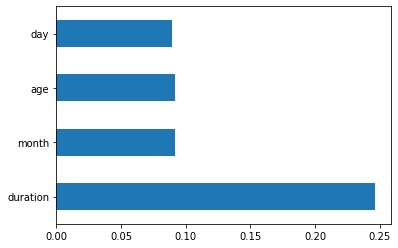

In [31]:
#using extra tree classifier we can get top 6 features or any top k features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x, y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

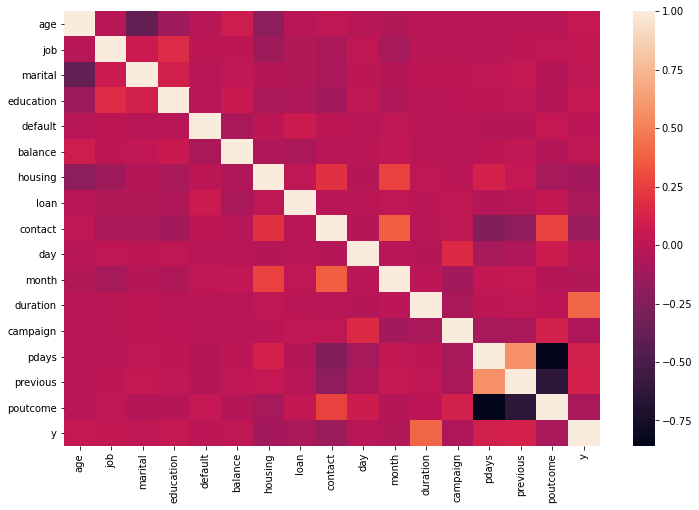

In [32]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr())

In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [34]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(random_state = 42)
selector = RFE(estimator, 5, step=1)
selector = selector.fit(x_train, y_train)
rfe_mask = selector.get_support() 
new_features = [] 
for bool, feature in zip(rfe_mask, x_train.columns):
  if bool:
    new_features.append(feature)
new_features

['age', 'balance', 'day', 'month', 'duration']

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

cls = GaussianNB()
cls.fit(x_train,y_train)

print(accuracy_score(y_test, cls.predict(x_test)))

0.8894620486366986


In [102]:
tmp = df.copy()
tmp = tmp[['age', 'day', 'month', 'duration', 'y']]
x = tmp.drop('y',axis=1)
y = tmp['y']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [103]:
cls = GaussianNB()
cls.fit(x_train,y_train)

print(accuracy_score(y_test, cls.predict(x_test)))

0.8928176795580111


In [92]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [60]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.97253186e-01, 1.63154315e-03, 9.85529940e-04, 1.29740969e-04])